# Notebooks imports and packages

In [1015]:
import matplotlib.pyplot as plt
import pandas
import numpy as np 
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
import math 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Example 1 - Simple cost function

$f(x) = x^2+x+1$

In [1016]:
def f(x):
    return x**2+x+1

In [1017]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num= 100)
print(x_1)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

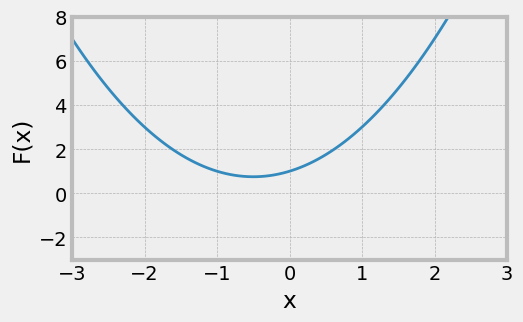

In [1018]:
#plot
plt.figure(figsize=(5,3))
plt.plot(x_1,f(x_1))

plt.show
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(-3,8)
plt.style.use('bmh')

# Slopes & Derivatives

$f(x)=2*x + 1 $


In [1019]:
def df(x):
    return 2*x+1

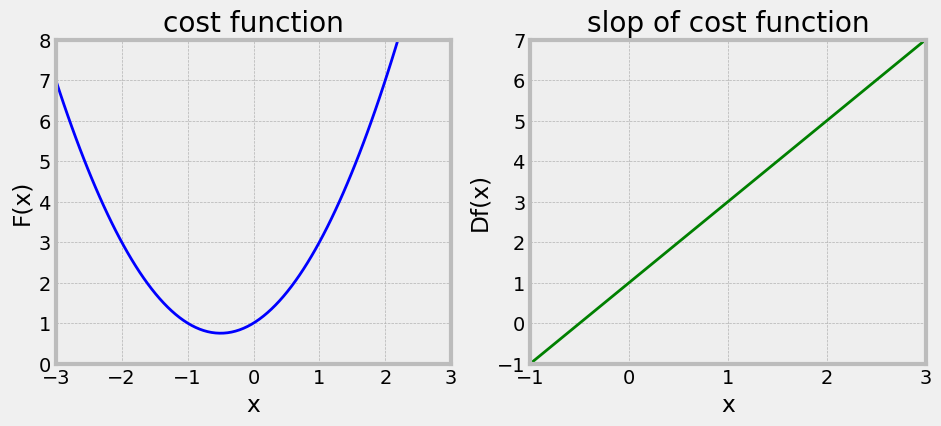

In [1020]:
#ploting subplots
#plot 1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1), color = 'blue',linewidth = 2)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('bmh')

#plot 2
plt.subplot(1,2,2)
plt.plot(x_1,df(x_1), color = 'green')
plt.show
plt.title('slop of cost function')
plt.xlim(-1,3)
plt.ylim(-1,7)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


## Gradient descent

In [1021]:
new_x = 3
previous_x = 0
alpha = 0.1
presicion = 0.00000000000000001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - alpha * gradient

    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < presicion:
        print('number of loops', i)
        break


print('the local minimum occurs at', new_x)
print('the value of slope or df(x) at this point is', df(new_x))
print('the cost or f(X) value at this point is',f(new_x))
type(slope_list)


number of loops 169
the local minimum occurs at -0.4999999999999999
the value of slope or df(x) at this point is 2.220446049250313e-16
the cost or f(X) value at this point is 0.75


list

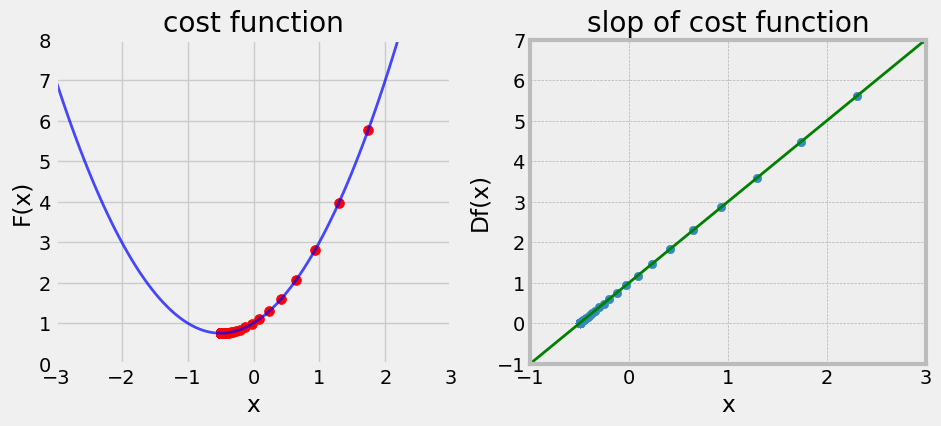

In [1022]:
#ploting gradient descent 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1), color = 'blue',linewidth = 2, alpha = 0.7)
values = np.array(x_list)
plt.scatter(x_list,f(values), color ='red',s = 50)
plt.show
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_1,df(x_1), color = 'green')
plt.scatter(x_list,slope_list,)
plt.show
plt.title('slop of cost function')
plt.xlim(-1,3)
plt.ylim(-1,7)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


# Example -2: Multiple Minima vs Initial Guess & Advanced Functions
$$ g(x) = x^4-4x^2+5$$

In [1023]:
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4-4*x**2+5
def dg(x):
    return 4*x**3-8*x

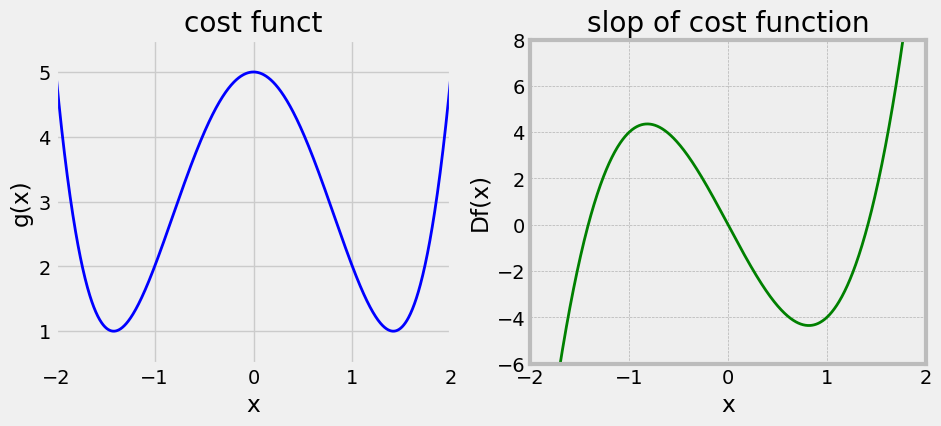

In [1024]:
#ploting subplots
#plot 1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2)
plt.show
plt.title('cost funct')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.style.use('bmh')

#plot 2
plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.show
plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Df(x)')
plt.style.use('fivethirtyeight')


## Gradient descent as a python function

In [1025]:
def gradient_descent(derivative_func,initial_guess, multiplier=0.02, precision=0.0001,max_iteration= 500):
    new_x = initial_guess
    previous_x = 0
    

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for i in range(max_iteration):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < presicion:
           
            break
    
    return new_x,x_list,slope_list


In [1026]:
local_min,list_x,deriv_list = gradient_descent(dg, 0.5)
print("local min occurs at", local_min)
print("number of steps", len(list_x))


local min occurs at 1.4142135623730947
number of steps 100


In [1027]:
local_min,list_x,deriv_list = gradient_descent(dg, -0.1)
print("local min occurs at", local_min)
print("number of steps", len(list_x))

local min occurs at -1.4142135623730947
number of steps 111


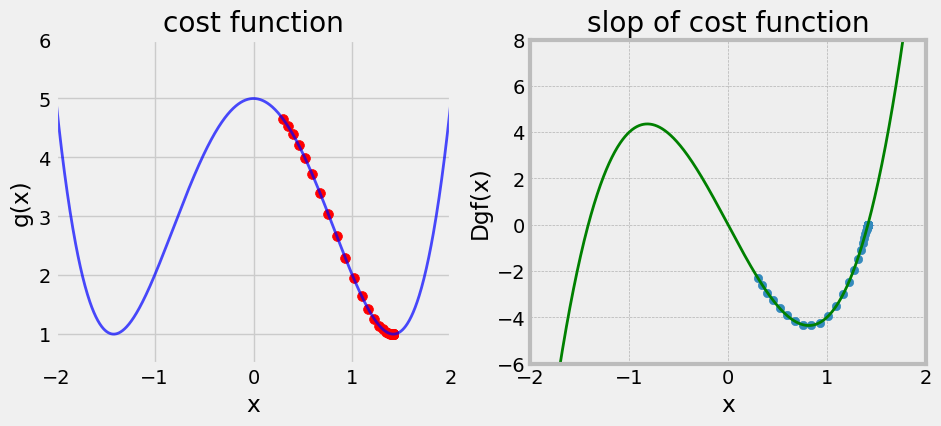

In [1028]:
#ploting gradient descent 
local_min,list_x,deriv_list = gradient_descent(dg, 0.3)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2, alpha = 0.7)

plt.scatter(list_x,g(np.array(list_x)), color ='red',s = 50)
 
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,6)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.scatter(list_x,deriv_list)

plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Dgf(x)')
plt.style.use('fivethirtyeight')



# Example - 3
## $$ h(x) = x^5-2x^4+2 $$


In [1029]:
x_3 = np.linspace(start= -2.5, stop= 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3    

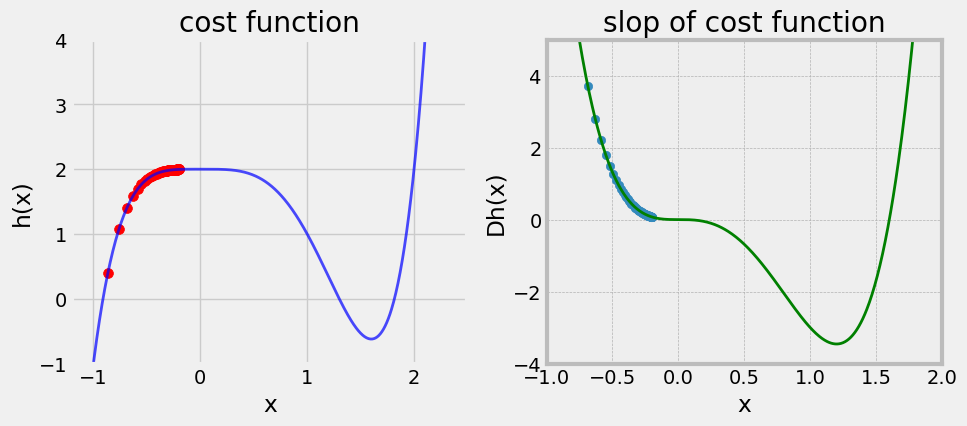

In [1030]:
#ploting gradient descent 
local_min,list_x,deriv_list = gradient_descent(dh, -0.2, max_iteration=70)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_3,h(x_3), color = 'blue',linewidth = 2, alpha = 0.7)

plt.scatter(list_x,h(np.array(list_x)), color ='red',s = 50)
 
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_3,dh(x_3), color = 'green')
plt.scatter(list_x,deriv_list)

plt.title('slop of cost function')
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('x')
plt.ylabel('Dh(x)')
plt.style.use('fivethirtyeight')



In [1031]:
local_min,list_x,deriv_list = gradient_descent(dh, -0.2, max_iteration=70)
print("local min occurs at", local_min)
print("the cost at that point is", h(local_min))
print("number of steps", len(list_x))


local min occurs at -2071072.4470816324
the cost at that point is -3.810455326061589e+31
number of steps 71


# The Learning Rate


number of steps is: 91


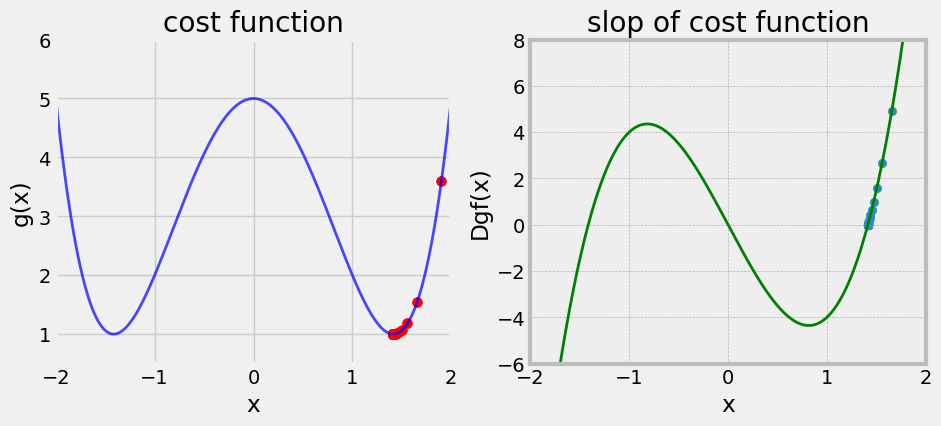

In [1032]:

local_min,list_x,deriv_list = gradient_descent(dg, 1.9,multiplier=0.02, max_iteration=500)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2), color = 'blue',linewidth = 2, alpha = 0.7)

plt.scatter(list_x,g(np.array(list_x)), color ='red',s = 50)
 
plt.title('cost function')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.xlim(-2,2)
plt.ylim(0.5,6)
plt.style.use('bmh')


plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2), color = 'green')
plt.scatter(list_x,deriv_list)

plt.title('slop of cost function')
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('x')
plt.ylabel('Dgf(x)')
plt.style.use('fivethirtyeight')

print('number of steps is:',len(list_x))



# Example 4
## Minimize $$ f(x,y) = \frac{1}{3^{-x^2-y^2}}$$

In [1033]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [1034]:
# making our x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)
print('shape of x is ', x_4.shape)

x_4,y_4 = np.meshgrid(x_4,y_4)
print(x_4.shape)

shape of x is  (200,)
(200, 200)


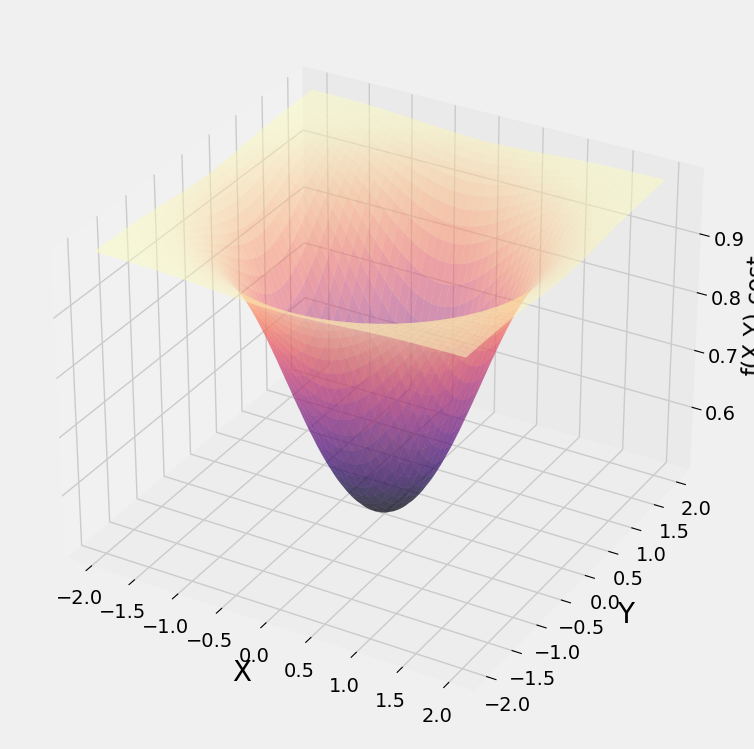

In [1035]:
#designing a 3-d graph
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x_4,y_4,f(x_4,y_4),color='red',cmap= cm.magma, alpha = 0.5)
ax.set_xlabel(r'X', fontsize = 20)
ax.set_ylabel(r'Y', fontsize = 20)
ax.set_zlabel(r'f(X,Y)-cost')
plt.show()


## Partial Derivaties $ Symbolic Computations

In [1036]:
a,b = symbols('x,y')
print('our cost function f(x,y) is:',f(a,b))
print('partial derivative wrt x is:',diff(f(a,b),a))
print('value of f(x,y) at x=1.8 and y =1.0 is',
      f(a,b).evalf(subs={a:1.8,b:1.0}))
print('slope of function f(x,y) or the parital derivative wrt to x at the same point is'
      ,diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
value of f(x,y) at x=1.8 and y =1.0 is 0.990604794032582
slope of function f(x,y) or the parital derivative wrt to x at the same point is 0.0368089716197505


## batch gradient descent with sympy

In [1037]:
# setup

mulitplier = 0.1
max_iter = 550
params = np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - mulitplier*gradients

#results
print("value in gradient array ",gradients)
print('the minimum value at x is ',params[0])
print('the minimum value at y is ',params[1])
print('the cost is',f(params[0],params[1]))

value in gradient array  [1.19236432185219e-12 6.62424623251217e-13]
the minimum value at x is  2.05143712417512e-12
the minimum value at y is  1.13968729120840e-12
the cost is 0.500000000000000


## Without using sympy
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}}{\left(3^{-x^2-y^2}+1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}}{\left(3^{-x^2-y^2}+1 \right)^2}$$

In [1038]:
def fpx(x,y):
    r = 3**((-x**2-y**2))
    
    return 2*x*math.log(3)*r/(r+1)**2

def fpy(x,y):
    r = r = 3**((-x**2-y**2))

    return 2*y*math.log(3)*r/(r+1)**2

In [1039]:
# without using sympy
mulitplier = 0.1
max_iter = 550
params = np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - mulitplier*gradients

#results
print("value in gradient array ",gradients)
print('the minimum value at x is ',params[0])
print('the minimum value at y is ',params[1])
print('the cost is',f(params[0],params[1]))

value in gradient array  [1.19236432e-12 6.62424623e-13]
the minimum value at x is  2.0514371241751123e-12
the minimum value at y is  1.1396872912083967e-12
the cost is 0.5


## Graphing 3D descent & adv numpy arrays

In [1040]:

mulitplier = 0.1
max_iter = 500
param = np.array([1.8,1.0])
values_array = param.reshape(1,2)
print(values_array)

print(values_array.shape)



for n in range(max_iter):
    gradient_x = fpx(param[0],param[1])
    gradient_y = fpy(param[0],param[1])
    gradients = np.array([gradient_x,gradient_y])
    param = param - mulitplier*gradients
    #values_array = np.append(values_array,params.reshape(1,2), axis =0)
    values_array = np.concatenate((values_array,param.reshape(1,2)),axis =0)

#results
print("value in gradient array ",gradients)
print('the minimum value at x is ',param[0])
print('the minimum value at y is ',param[1])
print('the cost is',f(param[0],param[1]))

[[1.8 1. ]]
(1, 2)
value in gradient array  [2.01013038e-11 1.11673910e-11]
the minimum value at x is  3.458385998858304e-11
the minimum value at y is  1.9213255549212797e-11
the cost is 0.5


In [1041]:
# adv numpy

nicknames = np.array(['mike','guitar'])
nicknames = nicknames.reshape(1,2)
print(nicknames.shape)
hs_band = np.array([['black thought', 'MC'],['magiclove', 'drums']])
print(hs_band.shape)

roots = np.append(arr = hs_band, values=nicknames, axis= 0)

print("exe",roots)
print(roots[0,:])



(1, 2)
(2, 2)
exe [['black thought' 'MC']
 ['magiclove' 'drums']
 ['mike' 'guitar']]
['black thought' 'MC']


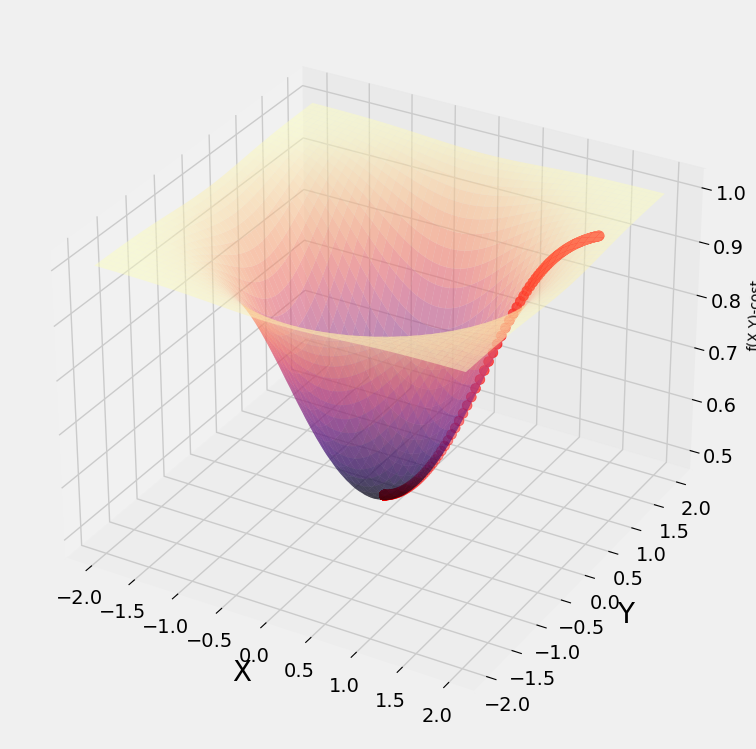

In [1042]:
#designing a 3-d graph
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection = '3d')


ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,Y)-cost', fontsize = 10)
ax.plot_surface(x_4,y_4,f(x_4,y_4),color='red',cmap= cm.magma, alpha = 0.5)
ax.scatter(values_array[:, 0],values_array[:, 1],
           f(values_array[:, 0],values_array[:, 1]),s =50, color ='red')



# Example 5- working with with Data and a Real Cost Function
## Mean Squared Error: A cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)}- h_\theta x^{(i)}\big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y- \hat{y}\big)^2 $$

In [1043]:
#make data
x_5 =np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)
print(x_5.shape)
print(y_5.shape)


(7, 1)
(7, 1)


In [1044]:
# quick regression

regr = LinearRegression()
regr.fit(x_5,y_5)

print('theta 0',regr.intercept_[0])
print('theta 1', regr.coef_[0][0])

theta 0 0.8475351486029545
theta 1 1.2227264637835913


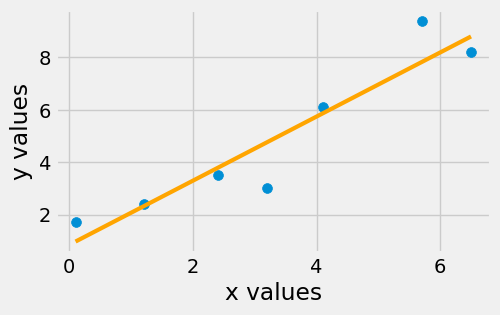

In [1045]:
plt.figure(figsize=(5,3))
plt.scatter(x_5,y_5,s =50)
plt.plot(x_5,regr.predict(x_5),color ='orange', linewidth =3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.style.use('bmh')


In [1046]:
# yhat = theta0+theta1*x
yhat = 0.8475351486029545+1.2227264637835913*x_5
print('estimated values y_hat are\n',yhat)
print('the actual y values are \n',y_5)

estimated values y_hat are
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [1047]:
def mse(y,y_hat):
    x = 0
    mse_cal = (y-y_hat)
    mse_cal = sum(((y-y_hat))**2)
    #mse_cal = np.average((y-y_hat)**2,axis=0)
    return (1/y.size)*mse_cal


print('manually calculated mse functions value is:',mse(y_5,yhat))
print('mse using sklearn function is but with manual yhat values', mean_squared_error(y_5,yhat))
print('mse using sklearn function is ', mean_squared_error(y_5,regr.predict(x_5)))

manually calculated mse functions value is: [0.94796558]
mse using sklearn function is but with manual yhat values 0.9479655759794577
mse using sklearn function is  0.9479655759794577


## 3D plot for the MSE Cost Function
### Make data for thetas

In [1048]:
nr_thetas = 200
th_0 = np.linspace(start=-1,stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)

In [1049]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        yhat = plot_t0[i][j]+plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5,yhat)

print('shape of plot t_0',plot_t0.shape)
print('shape of plot t_1',plot_t1.shape)
print('shape of plot_cosst',plot_cost.shape)

shape of plot t_0 (200, 200)
shape of plot t_1 (200, 200)
shape of plot_cosst (200, 200)


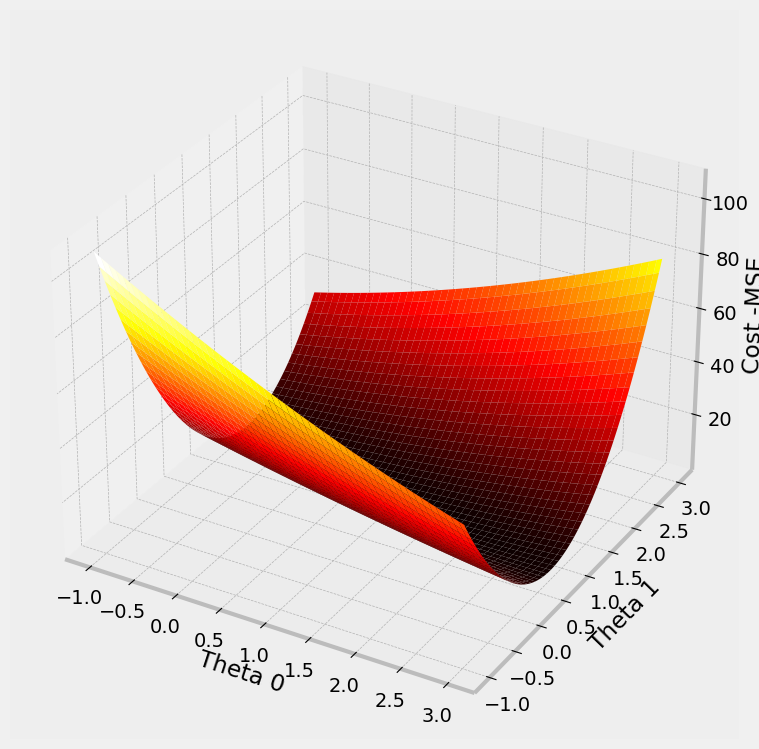

In [1051]:
#plotting mse

fig =plt.figure(figsize=[9,9])
ax = fig.add_subplot(111,projection = '3d')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost -MSE')

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap =cm.hot)
plt.show()

In [1057]:
print('min value of plot_cost', plot_cost.min())
print('Min value of plot cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape= plot_cost.shape)
print('min occurs at (i,j):', ij_min)
print('min MSE for theta_0 is at plot_t0[111][91]',plot_t0[111][91])
print('min MSE for theta_1 is at plot_t0[111][91]',plot_t1[111][91])

min value of plot_cost 0.9483826526747163
Min value of plot cost 0.9483826526747163
min occurs at (i,j): (111, 91)
min MSE for theta_0 is at plot_t0[111][91] 0.829145728643216
min MSE for theta_1 is at plot_t0[111][91] 1.2311557788944723
